TWITTER DATASET FOR SENTIMENT ANALYSIS

In [1]:
import pandas as pd
x='/home/kavya/Downloads/twitter.csv'
df=pd.read_csv('/home/kavya/Downloads/twitter.csv')
print(df)

          id  label                                              tweet  \
0          1      0   @user when a father is dysfunctional and is s...   
1          2      0  @user @user thanks for #lyft credit i can't us...   
2          3      0                                bihday your majesty   
3          4      0  #model   i love u take with u all the time in ...   
4          5      0             factsguide: society now    #motivation   
...      ...    ...                                                ...   
31957  31958      0  ate @user isz that youuu?ðððððð...   
31958  31959      0    to see nina turner on the airwaves trying to...   
31959  31960      0  listening to sad songs on a monday morning otw...   
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...   
31961  31962      0                   thank you @user for you follow     

                                           cleaned_tweet  
0      @user father dysfunctional selfish drags kids

In [2]:
#Data Cleaning Specially URl's,Mentions,Special characters by downloading stopwords from nltk.corpus package
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords list
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load the dataset
df = pd.read_csv('/home/kavya/Downloads/twitter.csv')

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
print(df)
def clean_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    # Remove user mentions
    tweet = re.sub(r'@\w+', '', tweet)
    # Remove special characters and punctuation
    tweet = re.sub(r'[^\w\s]', '', tweet)
    # Remove extra spaces
    tweet = ' '.join(tweet.split())
    return tweet

def remove_stop_words(tweet):
    words = tweet.split()
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)

# Apply cleaning functions
df['cleaned_tweet'] = df['tweet'].apply(clean_tweet)
df['cleaned_tweet'] = df['tweet'].apply(remove_stop_words)

# Save cleaned data
df.to_csv('/home/kavya/Downloads/twitter.csv', index=False)


[nltk_data] Downloading package stopwords to /home/kavya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/kavya/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


1
object


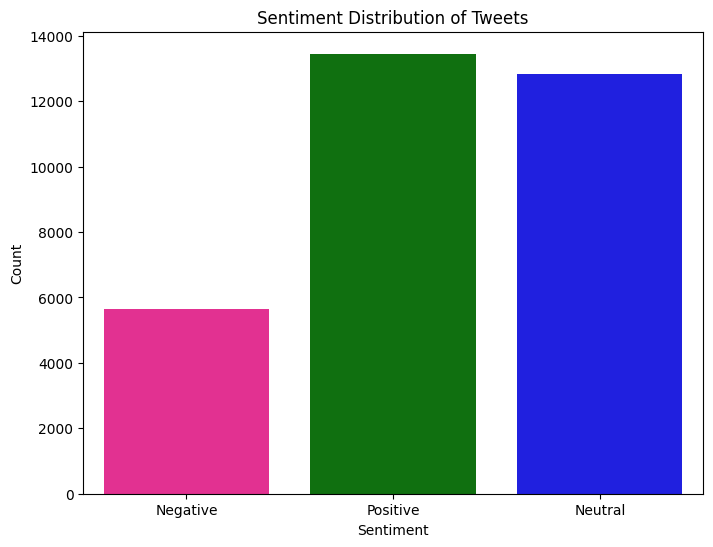

In [18]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Load the dataset
df = pd.read_csv('/home/kavya/Downloads/twitter.csv')
# Check for missing or non-string values
print(df['cleaned_tweet'].isna().sum())
print(df['cleaned_tweet'].dtype)

# Replace NaN values and ensure data type consistency
df['cleaned_tweet'] = df['cleaned_tweet'].fillna('')
df['cleaned_tweet'] = df['cleaned_tweet'].astype(str)


# Perform sentiment analysis
def analyze_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['cleaned_tweet'].apply(analyze_sentiment)
# Plot sentiment distribution
plt.figure(figsize=(8, 6))
color=['deeppink','green','blue']
sns.countplot(x='sentiment', data=df,palette=color,hue='sentiment',legend=False)
# plt.bar(x='sentiment',data=df,height=0.2)
plt.title('Sentiment Distribution of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


NEWS API DATASET

In [2]:
#here how the data is getting from NEWS API

import requests
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Initialize News API
url = 'https://newsapi.org/v2/everything'
params = {
    'q': 'climate change',
    'apiKey': '9b74470fa0df4a8fbc205ad9fbe9b95e'
}
# df=pd.DataFrame(params)
# print(df)
response = requests.get(url, params=params)
articles = response.json()['articles']

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Analyze sentiment
for article in articles:
    title = article['title']
    sentiment = analyzer.polarity_scores(title)
    print(f"Title: {title}")
    print(f"Sentiment: {sentiment}")


Title: Is climate change making hurricanes worse?
Sentiment: {'neg': 0.383, 'neu': 0.617, 'pos': 0.0, 'compound': -0.4767}
Title: America’s Aging Dams Are a Catastrophe Waiting to Happen
Sentiment: {'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'compound': -0.6597}
Title: The Workers Who Feed America Are Going Hungry
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Title: Will burying biomass underground curb climate change?
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Title: How Soon Might the Atlantic Ocean Break? Two Sibling Scientists Found an Answer—and Shook the World
Sentiment: {'neg': 0.085, 'neu': 0.915, 'pos': 0.0, 'compound': -0.1027}
Title: The Consequences of Climate Change in Brazil
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Title: What a Kamala Harris Presidency Would Mean for the Climate
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Title: ‘Wood Vaulting’ Explained: The Climate Solution You’ve Never 

CONVERTING  NEWS API DATA INTO EXCEL

In [1]:
#here converting the news api into excel and importing the excel data into dataframe
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
x='/home/kavya/news_sentiment_analysis.xlsx'
df=pd.read_excel(x)
print(df.head(10))


                                               Title  Sentiment_Compound  \
0         Is climate change making hurricanes worse?             -0.4767   
1  America’s Aging Dams Are a Catastrophe Waiting...             -0.6597   
2      The Workers Who Feed America Are Going Hungry              0.0000   
3  Will burying biomass underground curb climate ...              0.0000   
4  How Soon Might the Atlantic Ocean Break? Two S...             -0.1027   
5       The Consequences of Climate Change in Brazil              0.0000   
6  What a Kamala Harris Presidency Would Mean for...              0.0000   
7  ‘Wood Vaulting’ Explained: The Climate Solutio...              0.3182   
8  Why climate change makes a hurricane like Bery...             -0.2247   
9  This Ancient Technology Is Helping Millions St...              0.5423   

   Sentiment_Positive  Sentiment_Neutral  Sentiment_Negative  
0               0.000              0.617               0.383  
1               0.000              0.

BAR PLOT OF NEWSAPI consider 20-30 news titles

                                               Title  Sentiment_Compound  \
0         Is climate change making hurricanes worse?             -0.4767   
1  America’s Aging Dams Are a Catastrophe Waiting...             -0.6597   
2      The Workers Who Feed America Are Going Hungry              0.0000   
3  Will burying biomass underground curb climate ...              0.0000   
4  How Soon Might the Atlantic Ocean Break? Two S...             -0.1027   
5       The Consequences of Climate Change in Brazil              0.0000   
6  What a Kamala Harris Presidency Would Mean for...              0.0000   
7  ‘Wood Vaulting’ Explained: The Climate Solutio...              0.3182   
8  Why climate change makes a hurricane like Bery...             -0.2247   
9  This Ancient Technology Is Helping Millions St...              0.5423   

   Sentiment_Positive  Sentiment_Neutral  Sentiment_Negative  
0               0.000              0.617               0.383  
1               0.000              0.

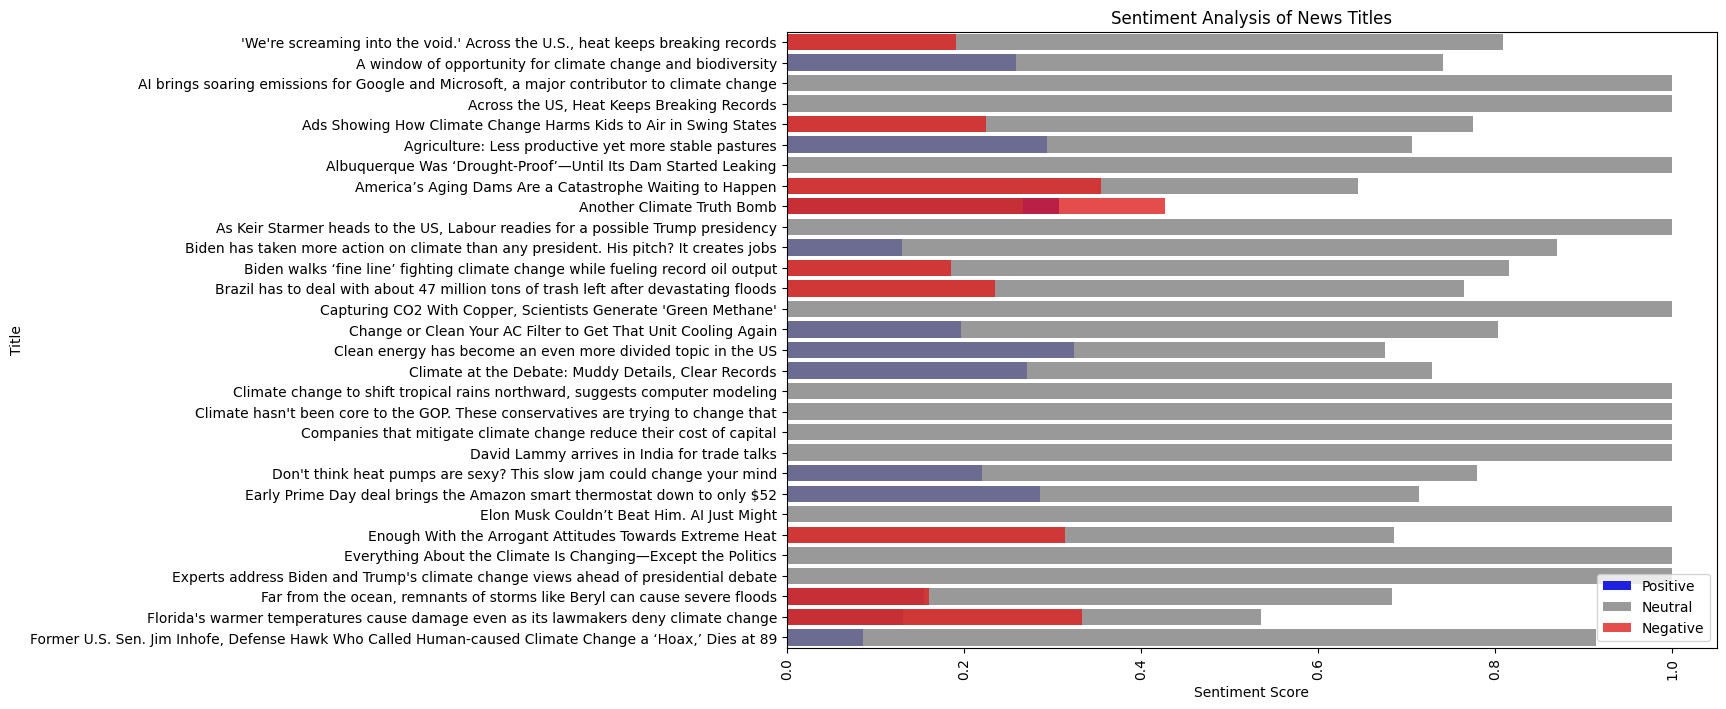

In [27]:
#BY USING BARPLOT from SEABORN shows the sentiment analysis of NEWSAPI either positive,negative or neutral of a particular news
import matplotlib.pyplot as plt
import pandas as pd
x='/home/kavya/news_sentiment_analysis.xlsx'
df=pd.read_excel(x)
print(df.head(10))
# Group by titles (you can group by any other feature if needed)
grouped_df = df.groupby('Title').mean().reset_index()

# If you still have too many titles, you can select a subset
grouped_df = grouped_df.head(30) 

plt.figure(figsize=(12, 8))

# Create bar plots for grouped data
sns.barplot(y='Title', x='Sentiment_Positive', data=grouped_df, color='blue', alpha=1.0, label='Positive')
sns.barplot(y='Title', x='Sentiment_Neutral', data=grouped_df, color='gray', alpha=0.8, label='Neutral')
sns.barplot(y='Title', x='Sentiment_Negative', data=grouped_df, color='red', alpha=0.8, label='Negative')

# Rotate the x labels for better readability
plt.xticks(rotation=90)

# Add title and labels
plt.title('Sentiment Analysis of News Titles')
plt.ylabel('Title')
plt.xlabel('Sentiment Score')
plt.legend()
plt.show()

In [ ]:
PIE CHART

                                               Title  Sentiment_Compound  \
0         Is climate change making hurricanes worse?             -0.4767   
1  America’s Aging Dams Are a Catastrophe Waiting...             -0.6597   
2      The Workers Who Feed America Are Going Hungry              0.0000   
3  Will burying biomass underground curb climate ...              0.0000   
4  How Soon Might the Atlantic Ocean Break? Two S...             -0.1027   

   Sentiment_Positive  Sentiment_Neutral  Sentiment_Negative  
0                 0.0              0.617               0.383  
1                 0.0              0.645               0.355  
2                 0.0              1.000               0.000  
3                 0.0              1.000               0.000  
4                 0.0              0.915               0.085  
**************
sum of positive= 9.116
sum of negative= 6.691
sum of nuetral= 84.19200000000001
sum of compound= 2.7871000000000015


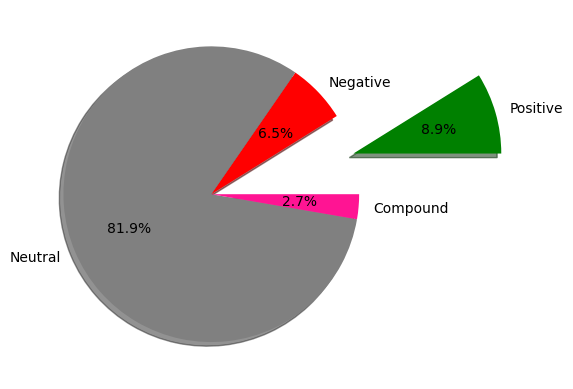

In [65]:
#now we have to calculate the sum of all the positve ,negative and neutral reviews of news dataset for piechart
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
x='/home/kavya/news_sentiment_analysis.xlsx'
df=pd.read_excel(x)
print(df.head(5))
print('**************')
sum_positive=df['Sentiment_Positive'].sum()
print("sum of positive=",sum_positive)
sum_negative=df['Sentiment_Negative'].sum()
print("sum of negative=",sum_negative)
sum_neutral=df['Sentiment_Neutral'].sum()
print("sum of nuetral=",sum_neutral)
sum_compound=df['Sentiment_Compound'].sum()
print("sum of compound=",sum_compound)
dict={'Positive':sum_positive,'Negative':sum_negative,'Neutral':sum_neutral,'Compound':sum_compound}
lables=dict.keys()
sizes=dict.values()
col=np.array(["green","red","gray","deeppink"])
exp=[1,0,0,0]
plt.pie(sizes,labels=lables,colors=col,explode=exp,shadow=True, autopct='%1.1f%%')
plt.show()